## Putting a neural net together
(from the excellent A. Karpathy of Stanford)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in xrange(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [4]:
# A Neural Network with one hidden layer
# initialize parameters randomly
h = 100 # size of hidden layer
theta1 = 0.01 * np.random.randn(D,h)
theta1_0 = np.zeros((1,h))
theta2 = 0.01 * np.random.randn(h,K)
theta2_0 = np.zeros((1,K))

In [6]:
# evaluate activations of hidden layer and output layer
hidden_layer = np.maximum(0, np.dot(X, theta1) + theta1_0) # note, ReLU activation
scores = np.dot(hidden_layer, theta2) + theta2_0

# do the softmax computation on output layer
# get unnormalized probabilities
exp_scores = np.exp(scores)
# normalize them for each example
probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

In [8]:
# compute the gradient on scores
num_examples = X.shape[0]
dscores = probs
dscores[range(num_examples),y] -= 1
dscores /= num_examples

# backpropate the gradient to the parameters
# first backprop into parameters theta2 and theta2_0
dtheta2 = np.dot(hidden_layer.T, dscores)
dtheta2_0 = np.sum(dscores, axis=0, keepdims=True)

# next backprop into hidden layer
dhidden = np.dot(dscores, theta2.T)
# backprop the ReLU non-linearity
dhidden[hidden_layer <= 0] = 0

# finally into theta1,theta1_0
dtheta1 = np.dot(X.T, dhidden)
dtheta1_0 = np.sum(dhidden, axis=0, keepdims=True)

In [43]:
# The full code
# initialize parameters randomly

h = 100 # size of hidden layer
theta1 = 0.01 * np.random.randn(D,h)
theta1_0 = np.zeros((1,h))
theta2 = 0.01 * np.random.randn(h,K)
theta2_0 = np.zeros((1,K))

# some hyperparameters
step_size = 1e-0
reg = 1e-2 # regularization strength

# gradient descent loop
num_examples = X.shape[0]
for i in xrange(10000):
  
    # evaluate class scores, [N x K]
    hidden_layer = np.maximum(0, np.dot(X, theta1) + theta1_0) # note, ReLU activation
    scores = np.dot(hidden_layer, theta2) + theta2_0
  
    # compute the class probabilities
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
  
    # compute the loss: average cross-entropy loss and regularization
    corect_logprobs = -np.log(probs[range(num_examples),y])
    data_loss = np.sum(corect_logprobs)/num_examples
    reg_loss = 0.5*reg*np.sum(theta1*theta1) + 0.5*reg*np.sum(theta2*theta2)
    loss = data_loss + reg_loss
    if i % 1000 == 0:
        print "iteration %d: loss %f" % (i, loss)
  
    # compute the gradient on scores
    dscores = probs
    dscores[range(num_examples),y] -= 1
    dscores /= num_examples
  
    # backpropate the gradient to the parameters
    # first backprop into parameters theta2 and theta2_0
    dtheta2 = np.dot(hidden_layer.T, dscores)
    dtheta2_0 = np.sum(dscores, axis=0, keepdims=True)
    # next backprop into hidden layer
    dhidden = np.dot(dscores, theta2.T)
    # backprop the ReLU non-linearity
    dhidden[hidden_layer <= 0] = 0
    # finally into theta1,theta1_0
    dtheta1 = np.dot(X.T, dhidden)
    dtheta1_0 = np.sum(dhidden, axis=0, keepdims=True)
  
    # add regularization gradient contribution
    dtheta2 += reg * theta2
    dtheta1 += reg * theta1
  
    # perform a parameter update
    theta1 += -step_size * dtheta1
    theta1_0 += -step_size * dtheta1_0
    theta2 += -step_size * dtheta2
    theta2_0 += -step_size * dtheta2_0

iteration 0: loss 1.098749
iteration 1000: loss 0.730369
iteration 2000: loss 0.730036
iteration 3000: loss 0.730016
iteration 4000: loss 0.730023
iteration 5000: loss 0.730002
iteration 6000: loss 0.730022
iteration 7000: loss 0.730007
iteration 8000: loss 0.730001
iteration 9000: loss 0.730009


In [44]:
# evaluate training set accuracy
hidden_layer = np.maximum(0, np.dot(X, theta1) + theta1_0)
scores = np.dot(hidden_layer, theta2) + theta2_0
predicted_class = np.argmax(scores, axis=1)
print 'training accuracy: %.2f' % (np.mean(predicted_class == y))

training accuracy: 0.76


-1.91641574744 1.97485671411


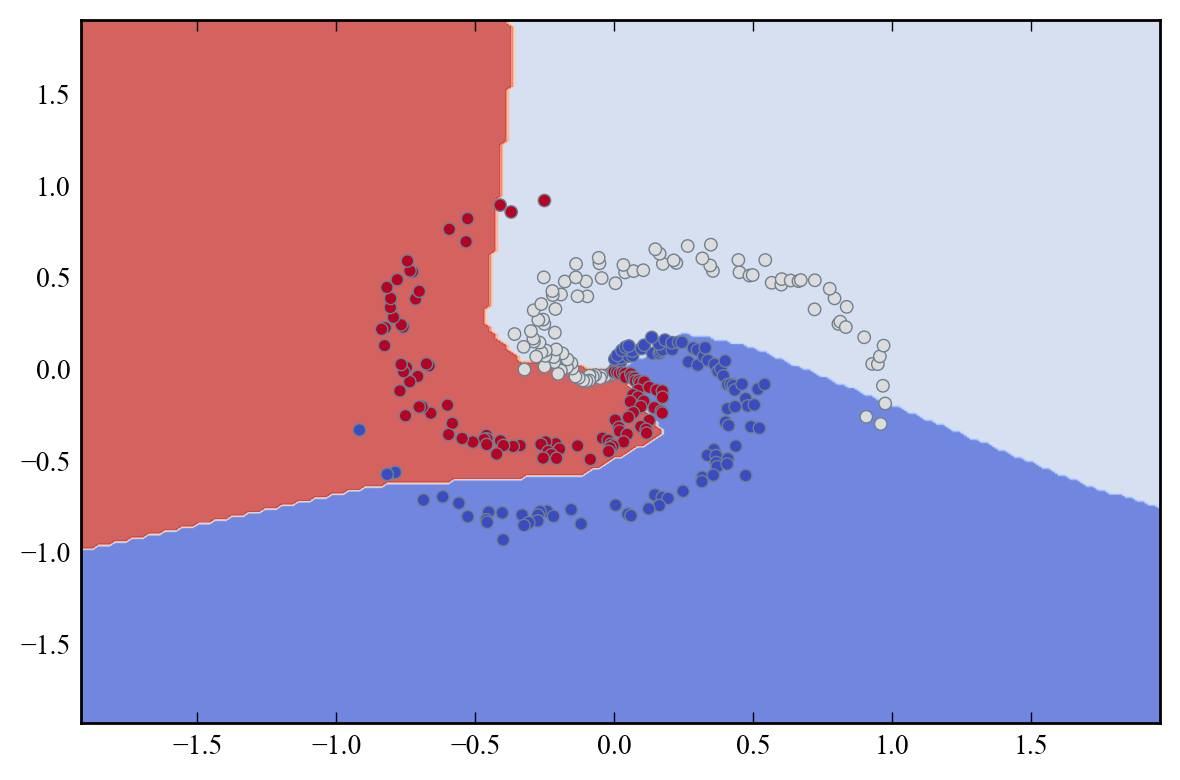

In [45]:
# Visualize the decision boundary
# (from sklearn)
# create a mesh to plot in

h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
print x_min, x_max
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

dd = np.c_[xx.ravel(), yy.ravel()]
hidden_layer = np.maximum(0, np.dot(dd, theta1) + theta1_0) # note, ReLU activation
scores = np.dot(hidden_layer, theta2) + theta2_0
exp_scores = np.exp(scores)
Z1 = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
Z = np.argmax(Z1,axis=1)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()